# Comparing Means of Different Groups

## Background

We can compare two groups to see if they differ in some measure (represented by a continuous variable) significantly by comparing each group's mean value of that continuous variable. 
In other words, we compare sub-groups of a categorical value by comparing the mean of a continuous variable across each of those sub-groups.

The statistical question you are asking is are these two groups from the same population? 

A test comparing means can help us answer questions like:

- Are the salaries of the marketing department higher than the company average? 
- Do customers who receive marketing emails spend more money than customers who do not receive marketing emails? 
- Are sales for product A higher when we run a promotion for it than when we do not run a promotion for it?

In this lesson we will explore the parametric tests of one-sample t-test, two-sample or independent t-test, and the one-way ANOVA; and the non-parametric test, the mann-whitney test. 


### Tests
_______________________________________________________________________

|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*|Non-parametric Test|  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*|One sample Wilcoxon signed rank test|   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*|Mann-Whitney's test|   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances|Kruskal-Wallis test|   

\*If assumptions can't be met, the equivalent non-parametric test can be used.   
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption. 

_________________________________________________________________


### Parametric vs. Non-Parametric Tests

The difference between Parametric and Non-Parametric tests is that parametric tests rely on a distribution. And in the case of t-tests and ANOVA, the distribution they rely on is a normal distribution.

There are other assumptions about the data made when running these tests, but let's talk this assumption of normality first. Unless your sample is small and not at all normal (the smaller your sample, the more normal your distribution needs to be. **If your sample is > 500 or so, you don't need to worry about normality assumption due to the central limit theorem**. If your sample is < 60 and not at all normal, then use a non-parametric test. In between, "it depends".

But what is the **Central Limit Theorem**?

__________________________________________

### Central Limit Theorem

The central limit theorem makes statistics work!

What does it mean? Even if your data is not normally distributed, the means of samples with replacement of that data will be normal. 

If you have a population (regardless of distribution) with mean μ and take sufficiently large random samples (usually N > 30 [for each independent sample]) from the population, with replacement, then the distribution of the sample means will be approximately normally distributed. 

Let's take the example of rolling a dice. We know that rolling a die is a random process, but imagine an experiment where we roll 10 dice and take the average roll. If we performed this experiment many times and plotted the resulting calculated averages of 10 dice rolls, we would expect to see a normal distribution.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

Simulate rolling a virtual die

In [2]:
# roll a 6 sided die 100,000 times
roll = stats.randint(1, 7).rvs(100_000)
roll

array([5, 1, 4, ..., 4, 2, 6])

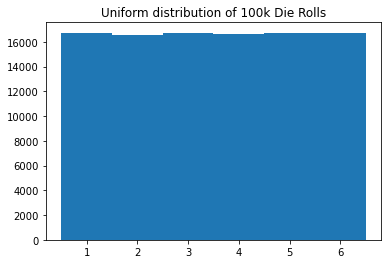

In [5]:
plt.hist(roll,
         bins=[1,2,3,4,5,6,7], 
         align='left')
plt.title('Uniform distribution of 100k Die Rolls')
plt.show()

In [6]:
roll.mean()

3.50204

In [7]:
avg = [roll.mean()]

In [19]:
# generate 100 samples of the mean of 100,000 rolls. 
for i in range(100):
    roll = stats.randint(1, 7).rvs(100_000)
    avg = avg + [roll.mean()]

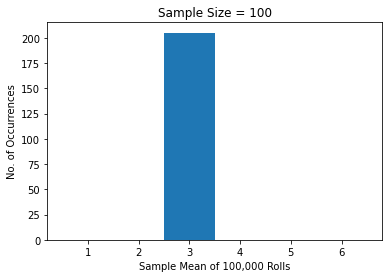

In [18]:
# plot the averages 

plt.hist(avg, 
         bins=[1,2,3,4,5,6,7],
         align='left')
plt.title("Sample Size = 100")
plt.xlabel("Sample Mean of 100,000 Rolls")
plt.ylabel("No. of Occurrences")
plt.show()

#### Distribution of sample means 
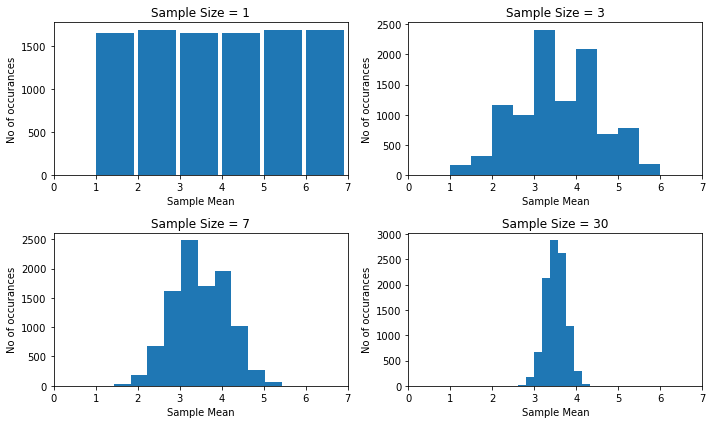

## Diving into Tests that Compare Means

# One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} != \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. **For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.**

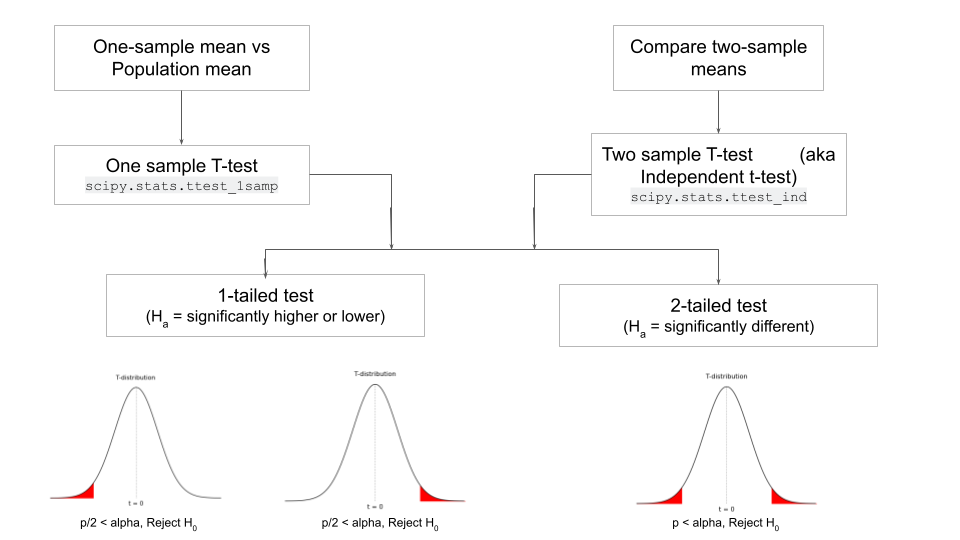

- t-statistic == 0 means no difference is means (i.e null hypothesis is true)
- Only when t-statistic is larger enough (positive or negative) we are confident that means are different enough to reject null

#### Example 1

I believe customers who churn are charged more (monthly average) than the overall average monthly charges.  
Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers? 

We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.  

In [20]:
# read from the SQL database

import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
df = pd.read_sql('SELECT * FROM customers', get_connection('telco_churn'))

In [21]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [23]:
# look at the head
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


**A. Plot Distribution**

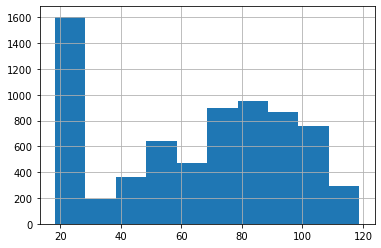

In [24]:
# Monthly charges is a single Series in our pandas data frame representing each
# customer's monthly charges in the dataset.
# Each independent observation in the data set has an associated monthly charge

# plot distribution of monthly charges

df.monthly_charges.hist()
plt.show()
# Distribution of *ALL* customers in the data set's monthly charges


**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers =< Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

In [25]:
theoretical_mean = df.monthly_charges.mean()
print(theoretical_mean)

sample_mean = df[df.churn == 'Yes'].monthly_charges.mean()
print(sample_mean)

64.7616924605992
74.44133226324232


**C. Set Alpha**

In [26]:
# remember that our confidence level determines our alpha, 
# which we use to compare to p
alpha = 0.05

**D. Verify Assumptions**

In [27]:
# How big is sample size for churned customers?
# If sample size is significantly > 30, 
# we don't have to worry about normality (CLT!!)
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions. 

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [33]:
churned_cust_charges = df[df.churn == 'Yes'].monthly_charges
theoretical_mean = df.monthly_charges.mean()

In [34]:
# churned_custs is the series of all customers monthly charges that have churned

In [35]:
# let's calculate our first t statistic and p value:
# invoked by a function call from sicpy stats that will return TWO VALUES
# tstat first, followed by p value

tstat, pval = stats.ttest_1samp(churned_cust_charges, theoretical_mean)

In [36]:
tstat, pval

(16.96540308050567, 3.740639299382399e-60)

**F. Decide**

Is $t > 0$ and $p/2 < \alpha$

In [37]:
if ((pval / 2) < alpha) and (tstat > 0):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


*in other words*...

In [ ]:
# Refresher of procedure up to this point:
# 1. ask a question of your data
# 1a. turn that question into a proper hypothesis
# 2. Is this a one-sample test or a two sample test?
#  2*: are we comparing two subgroups (2 sample) or one subgroup against the population (1 sample)
# 3. Is this a one-tailed or two-tailed test?
# 3*: Do we want to compare inequality (!=, tw-tailed, p) or directed inequality (<,>, one-tailed, p/2)
# 4: Make sure we establish a confidence level and alpha (usually alpha of 0.05)
# 5: Perform the test ==> if conditions are met, record that you rejected H0
# 5*: If we have a one-tailed test, tstat value must match comparison (i.e:
# t should be positive if Ha: mu_a > mu_th) AND p-value must be below alpha (for 
# two tailed, or p/2 < alpha for one-tailed)

#### Example 2

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers  

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

In [38]:
tstat, pval = stats.ttest_1samp(churned_cust_charges, theoretical_mean)
tstat, pval

(16.96540308050567, 3.740639299382399e-60)

**F. Is p-value less than alpha?**

In [39]:
pval < alpha

True

In [40]:
# if p < alpha, we can assert that we reject the null hypothesis

In [41]:
print('Is p less than alpha? ', pval < alpha)

Is p less than alpha?  True


*in other words...*

Churn significantly different than non churn

# Independent T-Test (a.k.a. Two Sample T-Test)

Goal: Compare mean of group a to mean of group b. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{a} != \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly smaller than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly larger than b)|$H_{a}$|$\mu_{a} > \mu_{b}$|      

3. Set Significance Level: $\alpha = .05$ (in other words Confidence level is 0.95)

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances (or set method argument to False when not)


5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`

6. Decide. 

#### Example 1

I believe customers who churn are charged more (monthly average) than customers who don't churn. 
Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn? 

We will use a 1-tailed ("significantly higher"), 2-sample (comparing 2 groups) t-test.  

<AxesSubplot:>

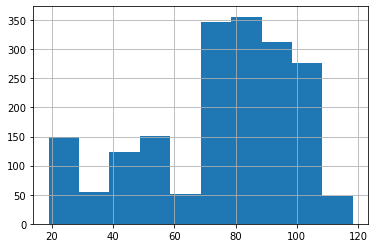

In [42]:
# histogram of churned customers
churn_sample = df[df.churn=='Yes'].monthly_charges
churn_sample.hist()

<AxesSubplot:>

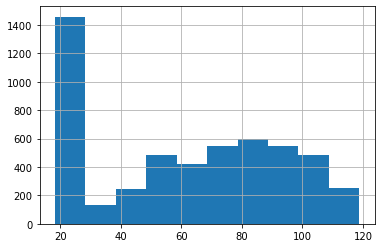

In [43]:
# histogram of non-churned customers
no_churn_sample = df[df.churn=='No'].monthly_charges
no_churn_sample.hist()

In [44]:
mean_a = churn_sample.mean()
mean_b = no_churn_sample.mean()

In [45]:
mean_a, mean_b

(74.44133226324232, 61.2651236954001)

**Set Hypothesis**

$H_{0}$: Mean of monthly charges for customers who have churned =< Mean of monthly charges of customers who have not churned

$H_{a}$: Mean of monthly charges for customers who have churned > Mean of monthly charges of customers who have not churned

**Set Alpha**

In [46]:
alpha = .05

**Verify Assumptions**

1. Independent Samples. YES! no observations in the churn sample exist in the no-churn sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [47]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
stat, pval = stats.levene(churn_sample, no_churn_sample)

In [52]:
pval

1.0261244899421871e-78

In [53]:
# we can reject the idea that there are equal variances in these two groups

If no, we will set the argument of equal_var to False. 


**Compute Test Statistic**

In [62]:
# implications of one-tailed two-sampled t-test:
# p will be divided by two because we are only looking at one tail of the curve
# we will pay attention to the sign of our t-statistic
# t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p

(18.407526676414673, 8.592449331547539e-73)

**Decide**

In [63]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


In [64]:
t, round(p, 10)

(18.407526676414673, 0.0)

Churn have Significantly Higher Charges than non-Churn

#### Example 2

Are charges of customers who churn *significantly different* than those who do not churn? 

$H_{0}$:   Monthly charges of customers that churn equals the monthly charges of thost that do not churn on average

$H_{a}$:  Monthly charges of customers that churn are on average inequal to those customers that have not churned



In [68]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p

(18.407526676414673, 8.592449331547539e-73)

Let's say assumptions were not met, how would we run the Mann-Whitney U test?

In [69]:
stat, p = stats.mannwhitneyu(churn_sample, no_churn_sample)
stat, p

(6003125.5, 3.311627651988585e-54)

**Decide**

Is the p-value less than alpha?

In [70]:
(p < alpha) == True

True

In [71]:
# yes, p < alpha == True

#### Example 3

Are charges of customers who churn *significantly less* than those who do not churn? 

$H_{0}$: average monthly charges of customers who churn => monthly average charges of customers who do not churn

$H_{a}$: average monthly charges of customers who churn < monthly average charges of customers who do not churn

In [72]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

**Decide**

is t < 0? AND is p/2 < alpha?


In [73]:
p

8.592449331547539e-73

In [74]:
t

18.407526676414673

In [75]:
if (t < 0) and ((p/2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


* one Tail = <= or > 
* (t < 0) and ((p/2) < alpha)
* vs
* two tail = ==
* (p < alpha)

#### Summary
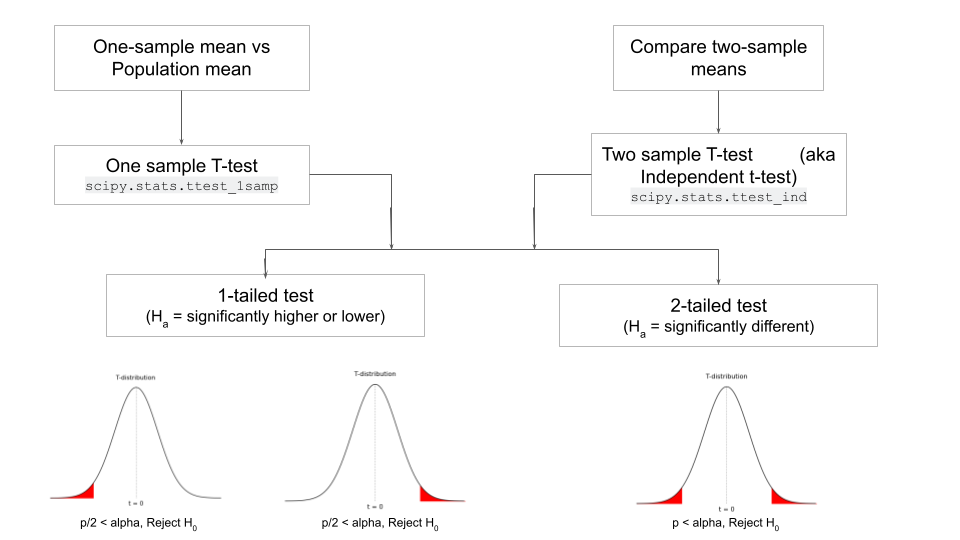

__________________________________________


### ANOVA Analysis of Variance & Kruskal Wallis Test

Goal: Compare means of groups a, b & c. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b} == \mu_{c}$|  
|Alternative Hypothesis (significantly different)|$H_{a}$|at least 2 groups' means are not equal|

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions:  If assumptions are met, use ANOVA, if not, use Kruskall Wallis
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances


5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.f_oneway` `scipy.stats.kruskal`

## Example 1

Is the sepal length significantly different across the different species of iris? 

In [76]:
df = sns.load_dataset('iris')
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [77]:
df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [78]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length

**A. Plot Distribution**

<AxesSubplot:>

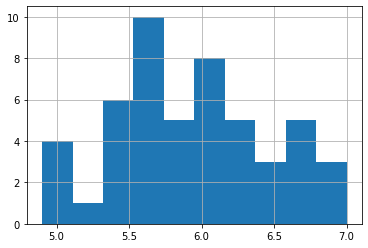

In [79]:
versicolor_sepal_length.hist()

<AxesSubplot:>

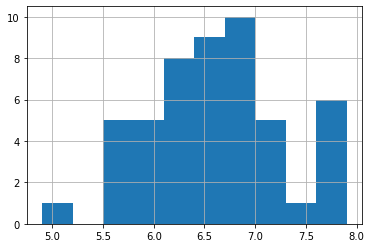

In [80]:
virginica_sepal_length.hist()

<AxesSubplot:>

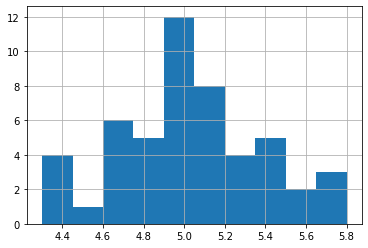

In [81]:
setosa_sepal_length.hist()

**B. State Hypotheses**

$H_{0}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are all equal.  

$H_{a}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are NOT all equal. 

**C. Set Significance Level**

In [84]:
alpha=.05

**D. Verify Assumptions**

- Independent samples: YES!  
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT). YES! the distributions are mostly normal  
- Equal Variances: ?

If not true, use Kruskal Wallis test

In [85]:
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())

0.2664326530612246
0.40434285714285706
0.12424897959183666


In [87]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
stat, pval = stats.levene(versicolor_sepal_length, setosa_sepal_length, virginica_sepal_length)
print(stat)
print(pval) # > alpha is equal variance

6.35272002048269
0.0022585277836218586


In [88]:
pval

0.0022585277836218586

**E. Compute test statistics**

In [89]:
stat, p = stats.kruskal(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
stat, p

(96.93743600064833, 8.91873433246198e-22)

Let's say assumptions were met, how would we run the ANOVA test? 

In [90]:
f, p = stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
f, p

(119.26450218450472, 1.6696691907693648e-31)

### Mini Exercise:

In [ ]:
# sns.load_data, grab 'mpg'

Are the USA origin vehicles heavier than vehicles with japan origin?

In [91]:
mpg = sns.load_dataset('mpg')

In [93]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


- What are we examining exactly?
- can we say that american vehicles are generally heavier than japanese ones?

- we will need to narrow down cars that were made in usa ==> mpg[mpg.origin ==  'usa']
- we will also need to narrow down cars that were made in japan ==> mpg[mpg.origin == 'japan']

- For each of these categories of vehicle, we want to examine the idea of their weight, which is mpg['weight], so we will extract the subset of the weight Series from each of these filtered dataframes.

- To combine those, the two series that we will be comparing are:
mpg[mpg['origin'] == 'usa'].weight
mpg[mpg['origin'] == 'japan'].weight

#### One tail or two tail?
 - I am not looking at pure inequality for this means test, because I want to see specifically if american vehicles are *heavier*, i.e. that the weight of american cars on average is *greater than* the weight on average of japanese cars (>)*

#### One sample or two sample?
 - Two sample. I am comparing the values within the subset american cars to the values within the subset of japanese cars. I know that I am not comparing just one subgroup (like american or japanese cars) to the total population, which would be represented by the entire mpg data set*

In [97]:
#usa = mpg[mpg.origin == 'usa'].weight
#japan = mpg[mpg.origin == 'japan'].weight

#### Decide?

One sample t-test or 2-sample t-test?  
One tailed or two tailed?

Two-Sample T-test, 1-tailed

In [98]:
# impact:
# we will use ttest_ind for a two-sample t-test
# because its a two sample t-test we will check the variance to see if we can 
# proceed with that parametric assumption
# we will use p/2 for our test against alpha *because it is one-tailed*
# because we are looking at american cars.weight > japanese cars.weight, 
# we want to establish that the t statistic is positive (under the assumption 
# that we feed the arguments into the ttest_ind() in that specific order)

#### Plot distributions

<AxesSubplot:>

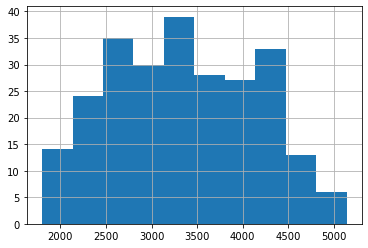

In [99]:
usa_weights = mpg[mpg['origin'] == 'usa'].weight
usa_weights.hist()

<AxesSubplot:>

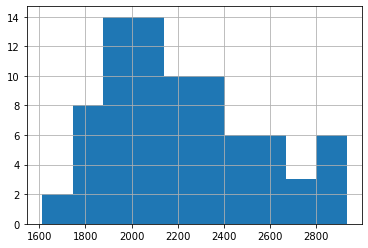

In [100]:
japan_weights = mpg[mpg['origin'] == 'japan'].weight
japan_weights.hist()

**Hypothesis**

$H_{0}$: average weight for usa origin vehicle =< average weight for japan origin vehicle

$H_{a}$: average weight for usa origin vehicle > average weight for japan origin vehicle



**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: Yes!
- Independent: Yes! 
- Variance: 

In [101]:
# lets perform a mini hypothesis test for variance:
# H0: the variance between weight of american cars and japanese cars is equivalent
# Ha: the variance between weight of american cars and japanense cars is inequal
# alpha: 0.05
stat, p_levene = stats.levene(usa_weights, japan_weights)
if p_levene < 0.05:
    print('we cannot assume equal variance')
else:
    print('we will assume equal variance')

we cannot assume equal variance


In [108]:
# use stats.ttest to calculate t and p
t_stat, p_val_ttest = stats.ttest_ind(usa_weights, japan_weights, equal_var=False)
t_stat, p_val_ttest/2

(18.414835265189918, 6.121879992583392e-52)

#### Decide

In [109]:
if (t_stat > 0) and ((p_val_ttest/2) < 0.05):
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [110]:
t_stat

18.414835265189918

In [112]:
p_val_ttest

1.2243759985166784e-51